In [23]:
pip install scikit-posthocs

In [24]:
import numpy as np
from scipy import stats
import pandas as pd
import scikit_posthocs as sp
pd.options.display.float_format = '{:,.4f}'.format

In [5]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [6]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

A university professor gave online lectures instead of face-to-face classes due to Covid-19. Later, he uploaded recorded lectures to the cloud for students who followed the course asynchronously (those who did not attend the lesson but later watched the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.

synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]

asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]

Conduct the hypothesis testing to check whether the professor's belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Observations in each sample are normally distributed.

Observations in each sample have the same variance.





In [7]:
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr =np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])

H0: The data is normally distributed.

H1: The data is not normally distributed.

Assume that alpha=0.05

If p-value is >0.05, it can be said that data is normally distributed.

In [8]:
check_normality(sync)
check_normality(asyncr)

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


p value:0.6556

Fail to reject null hypothesis >> The data is normally distributed

p value:0.0803

Fail to reject null hypothesis >> The data is normally distributed

H0: The variances of the samples are same.

H1: The variances of the samples are different.

It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity).

If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances

In [9]:
check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


p value:0.8149

Fail to reject null hypothesis >> The variances of the samples are same.

In [10]:
ttest,p_value = stats.ttest_ind(sync,asyncr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


p value:0.00753598

since the hypothesis is one sided we should use p_value/2

so p_value_one_sided:0.0038

Reject null hypothesis

**At this significance level, there is enough evidence to conclude that the average grade of the students who follow the course synchronously is higher than the async.**



---

A pediatrician wants to see the effect of formula consumption on the average monthly weight gain (in gr) of babies. For this reason, she collected data from three different groups. The first group is exclusively breastfed children(receives only breast milk), the second group is children who are fed with only formula and the last group is both formula and breastfed children. These data are as below

only_breast=[794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]

only_formula=[ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]

both=[976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

According to this information, conduct the hypothesis testing to check whether there is a difference between the average monthly gain of these three groups by using a 0.05 significance level. If there is a significant difference, perform further analysis to find what caused the difference. Before doing hypothesis testing, check the related assumptions. Comment on the results.

In [11]:
only_breast=np.array([794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7,
       717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1])

only_formula=np.array([ 898.8,  881.2,  940.2,  966.2,  957.5, 1061.7, 1046.2,  980.4,
        895.6,  919.7, 1074.1,  952.5,  796.3,  859.6,  871.1 , 1047.5,
        919.1 , 1160.5,  996.9])

both=np.array([976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6,
       805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 ,
       823.6, 818.7, 926.8, 791.7, 948.3])

H0: The data is normally distributed.

H1: The data is not normally distributed.

In [12]:
check_normality(only_breast)
check_normality(only_formula)
check_normality(both)

p value:0.4694
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8879
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7973
Fail to reject null hypothesis >> The data is normally distributed


H0: The variances of the samples are the same.

H1: The variances of the samples are different.

In [13]:
stat, pvalue_levene= stats.levene(only_breast,only_formula,both)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.7673
Fail to reject null hypothesis >> The variances of the samples are same.


H0: The mean of the samples is the same.

H1: At least one of them is different.

In [14]:
F, p_value = stats.f_oneway(only_breast,only_formula,both)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


**At this significance level, it can be concluded that at least one of the groups has a different average monthly weight gain.**

In [25]:
posthoc_df= sp.posthoc_ttest([only_breast,only_formula,both], equal_var=True, p_adjust="bonferroni")

group_names= ["only breast", "only formula","both"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,only breast,only formula,both
only breast,1.000000,0.000000,0.129454
only formula,0.000000,1.000000,0.000004
both,0.129454,0.000004,1.000000


At this significance level, it can be concluded that

*   "only breast" is different than "only formula"
*   "only formula" is different than both "only breast" and "both"
*   "both" is different than "only formula"



---

A human resource specialist working in a technology company is interested in the overwork time of different teams. To investigate whether there is a difference between overtime of the software development team and the test team, she selected 17 employees randomly in each of the two teams and recorded their weekly average overwork time in terms of an hour. The data is below.

test_team=[6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]

software_team=[2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

According to this information, conduct the hypothesis testing to check whether there is a difference between the overwork time of two teams by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results

In [15]:
test_team=np.array([6.2,  7.1,  1.5,  2,3 ,  2,  1.5,  6.1,  2.4,  2.3, 12.4,  1.8,  5.3,  3.1, 9.4,  2.3, 4.1])
developer_team=np.array([2.3,  2.1,  1.4,  2.0, 8.7,  2.2,  3.1,  4.2,  3.6, 2.5,  3.1,  6.2, 12.1,  3.9,  2.2, 1.2 ,3.4])

H0: The data is normally distributed.

H1: The data is not normally distributed.

In [16]:
check_normality(test_team)
check_normality(developer_team)

p value:0.0046
Reject null hypothesis >> The data is not normally distributed
p value:0.0005
Reject null hypothesis >> The data is not normally distributed


H0: The variances of the samples are the same.

H1: The variances of the samples are different.

In [17]:
check_variance_homogeneity(test_team, developer_team)

p value:0.5410
Fail to reject null hypothesis >> The variances of the samples are same.


H0: The mean of the samples are same.

H1: The mean of the samples are different.

In [18]:
ttest,pvalue = stats.mannwhitneyu(test_team,developer_team, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value:0.8226
Fail to recejt null hypothesis


**At this significance level, it can be said that there is no statistically significant difference between the average overwork time of the two teams.**



---
An e-commerce company regularly advertises on YouTube, Instagram, and Facebook for its campaigns. However, the new manager was curious about if there was any difference between the number of customers attracted by these platforms. Therefore, she started to use Adjust, an application that allows you to find out where your users come from. The daily numbers reported from Adjust for each platform are as below.

youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]

instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]

facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

According to this information, conduct the hypothesis testing to check whether there is a difference between the average customer acquisition of these three platforms using a 0.05 significance level. If there is a significant difference, perform further analysis to find that caused the difference. Before doing hypothesis testing, check the related assumptions. Comment on the results.


In [19]:
youtube=np.array([1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956,
       2146, 2151, 1943, 2125])

instagram =  np.array([2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340.,
       2349., 2241., 2396., 2244., 2267., 2281.])

facebook = np.array([2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178.,
       2113., 2048., 2443., 2265., 2095., 2528.])

H0: The data is normally distributed.

H1: The data is not normally distributed.

In [20]:
check_normality(youtube)
check_normality(instagram)
check_normality(facebook)

p value:0.0285
Reject null hypothesis >> The data is not normally distributed
p value:0.4156
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1716
Fail to reject null hypothesis >> The data is normally distributed


H0: The variances of the samples are the same.

H1: The variances of the samples are different.

In [21]:
stat, pvalue_levene= stats.levene(youtube, instagram, facebook)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0012
Reject null hypothesis >> The variances of the samples are different.


H0: The mean of the samples are same.

H1: At least one of them is different.

In [22]:
F, p_value = stats.kruskal(youtube, instagram, facebook)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000015
Reject null hypothesis


**At this significance level, at least one of the average customer acquisition number is different.**


In [26]:
posthoc_df = sp.posthoc_mannwhitney([youtube,instagram, facebook], p_adjust = 'bonferroni')
group_names= ["youtube", "instagram","facebook"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,youtube,instagram,facebook
youtube,1.000000,0.000010,0.002337
instagram,0.000010,1.000000,1.000000
facebook,0.002337,1.000000,1.000000


**The average number of customers coming from YouTube is different than the other (actually smaller than the others).**





---

The METU Health Center diagnosed eighteen students with high cholesterol in the previous semester. Healthcare personnel told these patients about the dangers of high cholesterol and prescribed a diet program. One month later, the patients came for control, and their cholesterol level was reexamined. Test whether there is a difference in the cholesterol levels of the patients.

According to this information, conduct the hypothesis testing to check whether there is a decrease in the cholesterol levels of the patients after the diet by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results

test_results_before_diet=[224, 235, 223, 253, 253, 224, 244, 225, 259, 220, 242, 240, 239, 229, 276, 254, 237, 227]

test_results_after_diet=[198, 195, 213, 190, 246, 206, 225, 199, 214, 210, 188, 205, 200, 220, 190, 199, 191, 218]

**Assumptions**

•  The dependent variable must be continuous (interval/ratio)

•  The observations are independent of one another

•  The dependent variable should be approximately normally distributed

In [27]:
test_results_before_diet=np.array([224, 235, 223, 253, 253, 224, 244, 225, 259, 220, 242, 240, 239, 229, 276, 254, 237, 227])
test_results_after_diet=np.array([198, 195, 213, 190, 246, 206, 225, 199, 214, 210, 188, 205, 200, 220, 190, 199, 191, 218])

H0: The data is normally distributed.

H1: The data is not normally distributed.

In [28]:
check_normality(test_results_before_diet)
check_normality(test_results_after_diet)

p value:0.1635
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1003
Fail to reject null hypothesis >> The data is normally distributed


H0: The true mean difference is equal to or bigger than zero.

H1: The true mean difference is smaller than zero.

In [29]:
test_stat, p_value_paired = stats.ttest_rel(test_results_before_diet,test_results_after_diet)
print("p value:%.6f" % p_value_paired , "one tailed p value:%.6f" %(p_value_paired/2))
if p_value_paired <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000008 one tailed p value:0.000004
Reject null hypothesis


**At this significance level, there is enough evidence to conclude mean cholesterol level of patients has decreased after the diet.**



---

A venture capitalist wanted to invest in a startup that provides data compression without any loss in quality, but there are two competitors: PiedPiper and EndFrame. Initially, she believed the performance of the EndFrame could be better but still wanted to test it before the investment. Then, she gave the same files to each company to compress and recorded their performance scores. The data is below.

piedpiper=[4.57, 4.55, 5.47, 4.67, 5.41, 5.55, 5.53, 5.63, 3.86, 3.97, 5.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25]

endframe = [4.27, 3.93, 4.01, 4.07, 3.87, 4. , 4. , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09]

According to this information, conduct the related hypothesis testing by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results.

Assumptions

• The dependent variable must be continuous (interval/ratio)

• The observations are independent of one another

• The dependent variable should be approximately normally distributed

H0: The data is normally distributed.

H1: The data is not normally distributed.

Assume that alpha=0.05

If p-value is >0.05, it can be said that data is normality distributed.

In [30]:
piedpiper=np.array([4.57, 4.55, 5.47, 4.67, 5.41, 5.55, 5.53, 5.63, 3.86, 3.97, 5.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25])
endframe = np.array([4.27, 3.93, 4.01, 4.07, 3.87, 4.  , 4.  , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09])
check_normality(piedpiper)
check_normality(endframe)

p value:0.0304
Reject null hypothesis >> The data is not normally distributed
p value:0.9587
Fail to reject null hypothesis >> The data is normally distributed


H0: The true mean difference is equal to or bigger than zero.

H1: The true mean difference is smaller than zero.

In [31]:
test,pvalue = stats.wilcoxon(endframe,piedpiper) ##alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(endframe,piedpiper, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value:0.000214 >> one_tailed_pval:0.000107
one sided pvalue:0.000107
Reject null hypothesis


Reject H0

**At this significance level, there is enough evidence to conclude that the performance the PiedPaper is better than the EndFrame.**



---


A researcher was curious about whether there is a difference between the methodology she developed, C, and baseline methods A and B in terms of performance. Therefore, she decided to design different experiments and recorded the achieved accuracy by each method. The below table shows the achieved accuracy on test sets by each method. Please note that the same train and test sets were used for each method.
   
   

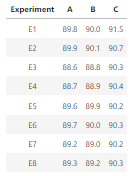

According to this information, conduct the hypothesis testing to check whether there is a difference between the performance of the methods by using a 0.05 significance level. If there is a significant difference, perform further analysis to find which one caused the difference. Before doing hypothesis testing, check the related assumptions. Comment on the results.

Assumptions


*   Observations in each sample are independent and identically distributed (iid).
*   Observations in each sample are normally distributed.
*   Observations in each sample have the same variance.

H0: The data is normally distributed.

H1: The data is not normally distributed

In [32]:
method_A = np.array([89.8, 89.9, 88.6, 88.7, 89.6, 89.7, 89.2, 89.3])
method_B =   np.array([90.0, 90.1, 88.8, 88.9, 89.9, 90.0, 89.0, 89.2])
method_C = np.array([91.5, 90.7, 90.3, 90.4, 90.2, 90.3, 90.2, 90.3])

check_normality(method_A)
check_normality(method_B)
check_normality(method_C)

p value:0.3076
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0515
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0016
Reject null hypothesis >> The data is not normally distributed


H0: The variances of the samples are the same.

H1: The variances of the samples are different.

In [33]:
stat, pvalue_levene= stats.levene(method_A, method_B, method_C)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.1953
Fail to reject null hypothesis >> The variances of the samples are same.


In [36]:
test_stat,p_value = stats.friedmanchisquare(method_A,method_B, method_C)
print("p value:%.4f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

print(np.round(np.mean(method_A),2),' ', np.round(np.mean(method_B),2),' ', np.round(np.mean(method_C),2))

p value:0.0015
Reject null hypothesis
89.35   89.49   90.49


In [37]:
data = np.array([method_A, method_B, method_C])
posthoc_df=sp.posthoc_wilcoxon(data, p_adjust="holm")


group_names= ["Method A", "Method B","Method C"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,Method A,Method B,Method C
Method A,1.000000,0.078125,0.023438
Method B,0.078125,1.000000,0.023438
Method C,0.023438,0.023438,1.000000



**Method C outperformed others and achieved better accuracy scores than the others.**



---

An analyst of a financial investment company is curious about the relationship between gender and risk appetite. A random sample was taken of 660 customers from the database. The customers in the sample were classified according to their gender and their risk appetite. The result is given in the following table.



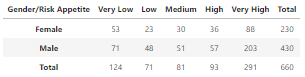

Test the hypothesis that the risk appetite of the customers in this company is independent of their gender. Use α = 0.01.

H0: Gender and risk appetite are independent.

H1: Gender and risk appetite are dependent.

chi2 test should be used for this question. This test is known as the goodness-of-fit test. It implies that if the observed data are very close to the expected data. The assumption of this test every Ei ≥ 5 (in at least 80% of the cells) which is satisfied.

In [38]:
from scipy.stats import chi2_contingency

obs =np.array([[53, 23, 30, 36, 88],[71, 48, 51, 57, 203]])
chi2, p, dof, ex = chi2_contingency(obs, correction=False)

print("expected frequencies:\n ", np.round(ex,2))
print("degrees of freedom:", dof)
print("test stat :%.4f" % chi2)
print("p value:%.4f" % p)

expected frequencies:
  [[ 43.21  24.74  28.23  32.41 101.41]
 [ 80.79  46.26  52.77  60.59 189.59]]
degrees of freedom: 4
test stat :7.0942
p value:0.1310


In [39]:
from scipy.stats import chi2

alpha = 0.01
df = (5-1)*(2-1)
critical_stat = chi2.ppf((1-alpha), df)
print("critical stat:%.4f" % critical_stat)

critical stat:13.2767


Since p value is larger than α=0.01 (or calculated statistic = 7.14 is smaller than the critical statistic = 13.28)

Fail to Reject H0. At this significance level, it can be concluded that gender and risk appetite are independent.